In [20]:
from google.colab import files
uploaded = files.upload()

Saving Unemployment in India.csv to Unemployment in India (2).csv


In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')

In [22]:
df = pd.read_csv("Unemployment in India.csv")

In [23]:
df.columns = df.columns.str.strip()

In [24]:
df.dropna(inplace=True)

In [25]:
df.sort_values('Date', inplace=True)


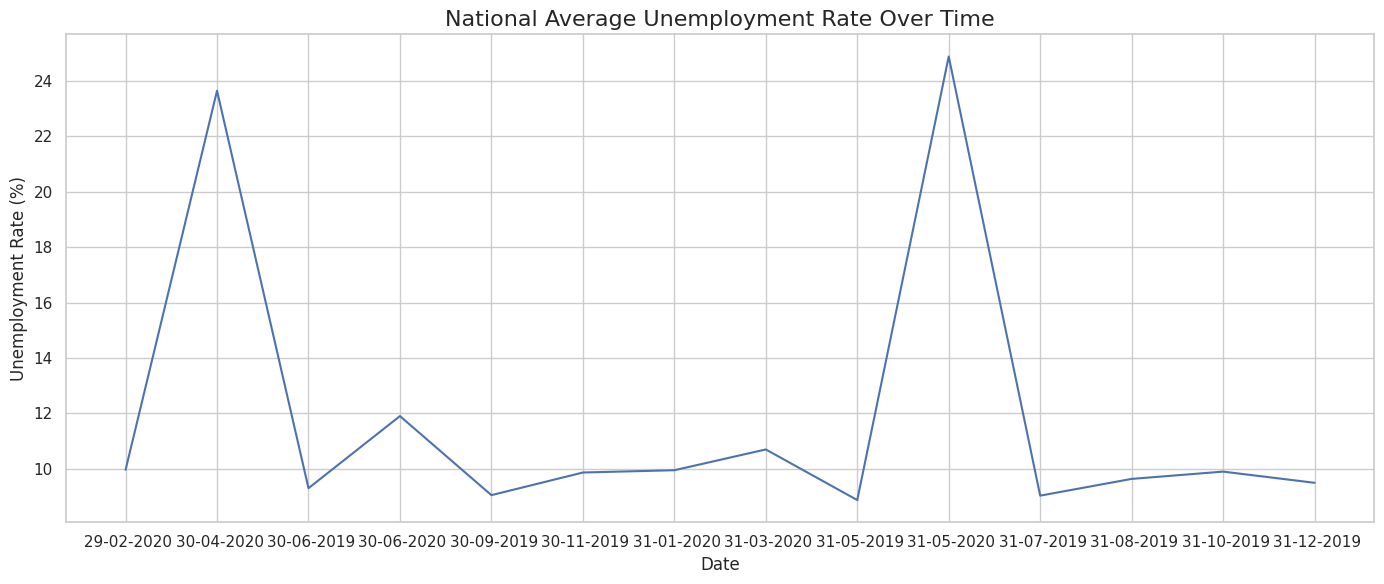

In [26]:
national_trend = df.groupby('Date')['Estimated Unemployment Rate (%)'].mean()
plt.figure(figsize=(14,6))
sns.lineplot(x=national_trend.index, y=national_trend.values)
plt.title('National Average Unemployment Rate Over Time', fontsize=16)
plt.xlabel('Date')
plt.ylabel('Unemployment Rate (%)')
plt.grid(True)
plt.tight_layout()
plt.show()

<ipython-input-27-fb781cc27996>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_states.values, y=top_states.index, palette='viridis')


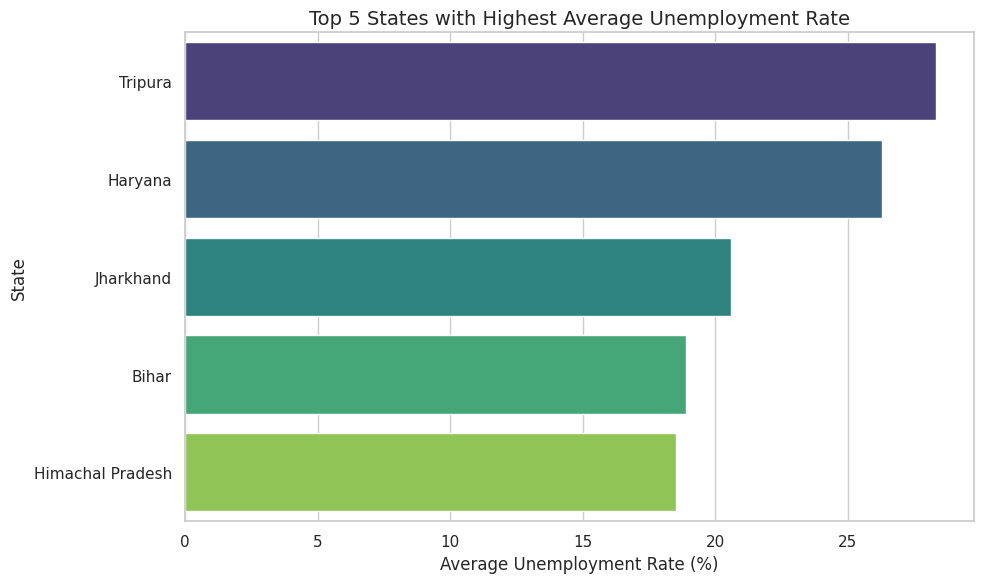

In [27]:
top_states = df.groupby('Region')['Estimated Unemployment Rate (%)'].mean().sort_values(ascending=False).head(5)

plt.figure(figsize=(10,6))
sns.barplot(x=top_states.values, y=top_states.index, palette='viridis')
plt.title('Top 5 States with Highest Average Unemployment Rate', fontsize=14)
plt.xlabel('Average Unemployment Rate (%)')
plt.ylabel('State')
plt.tight_layout()
plt.show()

In [28]:
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True, errors='coerce')


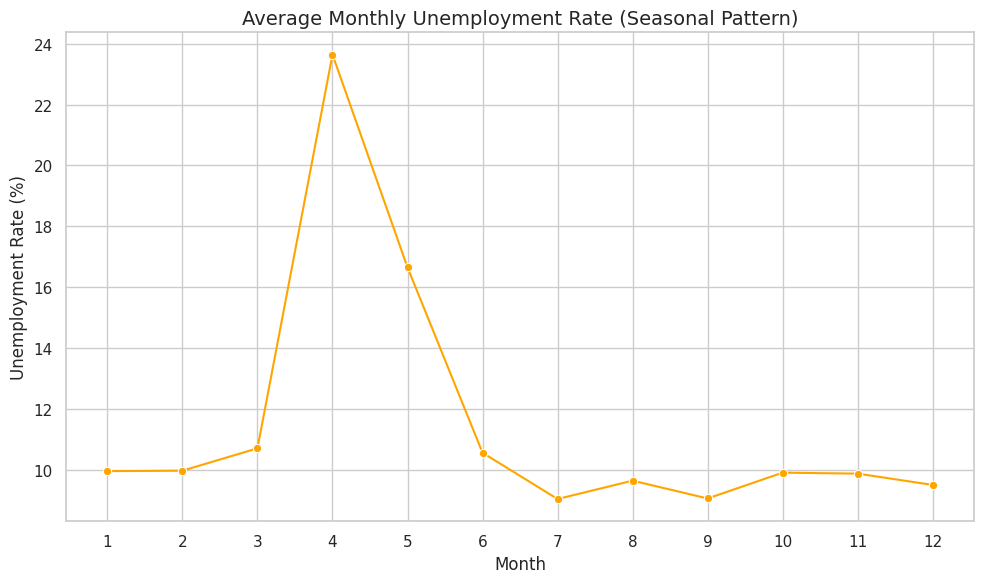

In [29]:
df['Month'] = df['Date'].dt.month
monthly_avg = df.groupby('Month')['Estimated Unemployment Rate (%)'].mean()

plt.figure(figsize=(10,6))
sns.lineplot(x=monthly_avg.index, y=monthly_avg.values, marker='o', color='orange')
plt.title('Average Monthly Unemployment Rate (Seasonal Pattern)', fontsize=14)
plt.xlabel('Month')
plt.ylabel('Unemployment Rate (%)')
plt.grid(True)
plt.xticks(range(1,13))
plt.tight_layout()
plt.show()


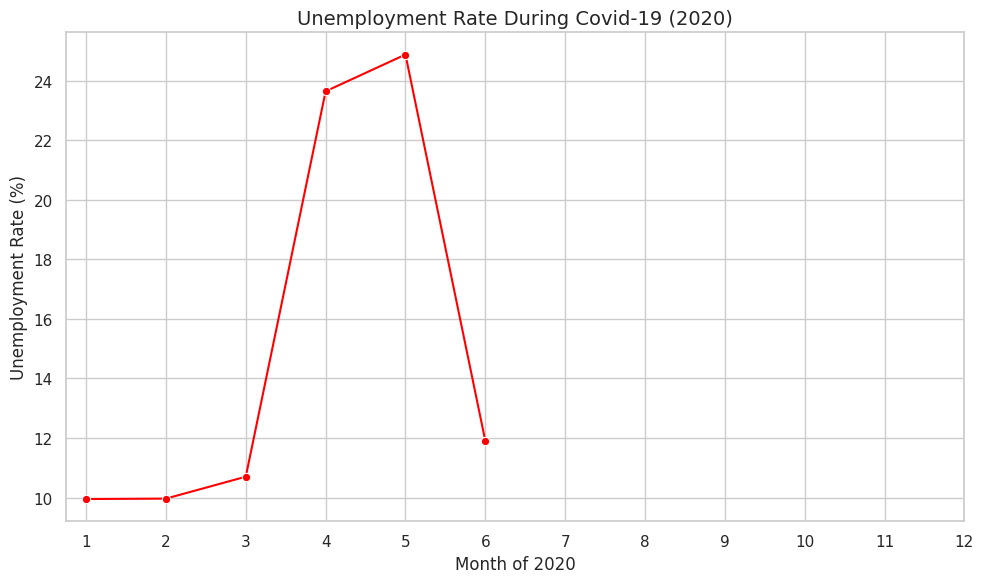

In [30]:
covid_period = df[df['Date'].dt.year == 2020]
covid_monthly = covid_period.groupby(covid_period['Date'].dt.month)['Estimated Unemployment Rate (%)'].mean()

plt.figure(figsize=(10,6))
sns.lineplot(x=covid_monthly.index, y=covid_monthly.values, marker='o', color='red')
plt.title('Unemployment Rate During Covid-19 (2020)', fontsize=14)
plt.xlabel('Month of 2020')
plt.ylabel('Unemployment Rate (%)')
plt.grid(True)
plt.xticks(range(1, 13))
plt.tight_layout()
plt.show()